In [7]:
import warnings
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import json 
#loading data from json
with open('chatbotData.json', 'r') as f:
    data = json.load(f)
data = data['intents']

In [8]:
import pandas as pd
dataset = pd.DataFrame(columns=['intent','patterns', 'responses'])
print(dataset)
for i in data:
    intent = i['tag']
    for t, r in zip(i['patterns'], i['responses']):
        row = {'intent': intent, 'patterns': t, 'responses':r}
        dataset = dataset.append(row, ignore_index=True)
dataset


Empty DataFrame
Columns: [intent, patterns, responses]
Index: []


,intent,patterns,responses
0,greeting,Hi,Hey :-)
1,greeting,Hey,"Hello, thanks for visiting"
2,greeting,Is anyone there?,"Hi there, what can I do for you?"
3,greeting,Hello,"Hi there, how can I help?"
4,goodbye,Bye,"See you later, thanks for visiting"
...,...,...,...
58,Recreational Activities,What are the sports available in the campus?,"The recreational activities include gym, table..."
59,Exam Schedule,When the examinations take place?,Examinations take place generally at the end o...
60,Exam Schedule,What is the general schedule of exams?,You will mind exam schedule under your course ...
61,Health Insurance,What are the student health insurance plans?,The health insurance plans can be see on Dalho...


In [9]:
intent = dataset.groupby("intent")
intent.describe().head()

patterns         \
                            count unique   
intent                                     
Academic Advice                 2      2   
Admission Requirements          2      2   
Application Deadlines           2      2   
Awards and Financial Aid        2      2   
Business                        3      3   

                                                                             \
                                                                        top   
intent                                                                        
Academic Advice           Can you offer me some academic advice about va...   
Admission Requirements    What are the admission requirements in undergr...   
Application Deadlines     Can you please let me know about the course de...   
Awards and Financial Aid  Are there any awards or financial aid given by...   
Business                                   What kind of business do you do?   

                              responses         \
                         freq     count unique   
intent                                           
Academic Advice             1         2      2   
Admission Requirements      1         2      2   
Application Deadlines       1         2      2   
Awards and Financial Aid    1         2      2   
Business                    1         3      3   

                                                                             \
                                                                        top   
intent                                                                        
Academic Advice           We have a team which can help you will academi...   
Admission Requirements    You can access information reqgarding admissio...   
Application Deadlines     The deadlines of a particular course can be ac...   
Awards and Financial Aid  You can check for awards and financial aid at ...   
Business                  I am DalBot. I assist you with your queries re...   

                               
                         freq  
intent                         
Academic Advice             1  
Admission Requirements      1  
Application Deadlines       1  
Awards and Financial Aid    1  
Business                    1

In [10]:
def cosine_distance_countvectorizer_method(s1, s2):
    
    # sentences to list
    allsentences = [s1 , s2]
    
    # packages
    from sklearn.feature_extraction.text import CountVectorizer
    from scipy.spatial import distance
    
    # text to vector
    vectorizer = CountVectorizer()
    all_sentences_to_vector = vectorizer.fit_transform(allsentences)
    text_to_vector_v1 = all_sentences_to_vector.toarray()[0].tolist()
    text_to_vector_v2 = all_sentences_to_vector.toarray()[1].tolist()
    
# distance of similarity
    cosine = distance.cosine(text_to_vector_v1, text_to_vector_v2)
    return (1-cosine)

In [11]:
def respond(text):
    maximum = float('-inf')
    response = ""
    closest = ""
    frequencies = {}
    keys = []
    values = []
    for i in dataset.iterrows():
        sim = cosine_distance_countvectorizer_method(text, i[1]['patterns'])
        if(i[1]['intent'] in frequencies):
            frequencies[i[1]['intent']] += sim
        else:
            frequencies[i[1]['intent']] = sim
        if sim > maximum:
            maximum = sim
            response = i[1]['responses']
            closest = i[1]['patterns']
    
    
    if(maximum == 0):
        response = "I do not understand, please try entering something else..."
    else:
        for key in frequencies.keys():
            frequencies[key] += 1
            keys.append(key)
            values.append(frequencies[key]*1000)
        wordcloud = WordCloud(background_color="white")
        wordcloud.generate_from_frequencies(frequencies)
        # Display the generated image:
        plt.imshow(wordcloud.generate_from_frequencies(frequencies), interpolation='bilinear')
        plt.axis("off")
        plt.show()
        
        New_Colors = ['green','blue','purple','brown','teal']
        plt.figure(figsize=(15,4))
        plt.bar(keys, values, color= New_Colors)
        plt.xticks(rotation=90)
        plt.title('Intent vs Consine Similarity',fontsize=14)
        plt.xlabel('Intent',fontsize=14)
        plt.ylabel('Cosine Distance',fontsize=14)
        plt.grid(True)
        plt.show()
        
    return response

Please enter your username: SRS
support: Hi SRS, welcome to Q&A support. How can I help you?
Let's chat! (type 'quit' to exit)
Input: What are the courses that you offer?


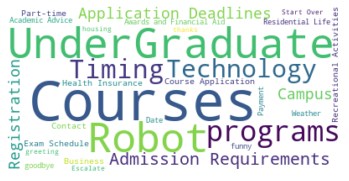

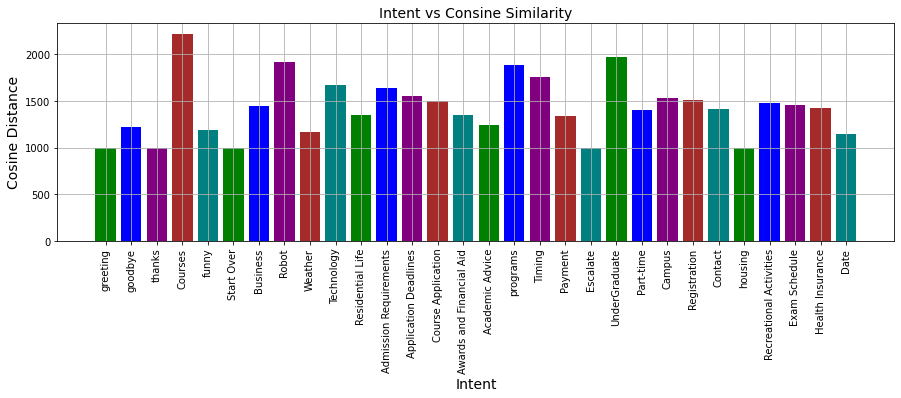

DalBot: You can find the list of courses on the faculty of computer science website


In [ ]:
usr = input("Please enter your username: ")
print("support: Hi " + usr + ", welcome to Q&A support. How can I help you?")
print("Let's chat! (type 'quit' to exit)")
while True:
    text = str(input("Input: "))
    if(text.lower() == ""):
        print("Please enter text")
        continue
    if text.lower() == "exit":
        print("DalBot: Exiting.....")
        break
    print("DalBot:",respond(text))